# Project - Unsupervised Learning
## The goal of this mini-project is to evaluate the data, decide which clustering algorithm touse, determine how many clusters we should have, and then apply the algorithm to cluster the data.




## 0. Load the data from Unsupervised_X.csv file

In [ ]:
from google.colab import files
import pandas as pd
import io
import os

X_data_dict = files.upload() #uploads as a disctionary and creates a file
os.remove('Unsupervised_X.csv') #remove the file created during upload that is in the root folder
X_data = pd.read_csv(io.StringIO(X_data_dict['Unsupervised_X.csv'].decode('utf-8')),sep=',') #get the data from the dictionary to the dataframe

unsupervised_dir_path = os.path.join("datasets", "unsupervised")
os.makedirs(unsupervised_dir_path, exist_ok=True) #create the folder
unsupervised_csv_path = os.path.join(unsupervised_dir_path, "Unsupervised_X.csv") #create the path for the csv file 

X_data.to_csv(unsupervised_csv_path, index=False) #save the data to csv file


Saving Unsupervised_X.csv to Unsupervised_X.csv


In [ ]:
import pandas as pd
import os

unsupervised_dir_path = os.path.join("datasets", "unsupervised")
unsupervised_csv_path = os.path.join(unsupervised_dir_path, "Unsupervised_X.csv") #create the path for the csv file 

X_data = pd.read_csv(unsupervised_csv_path)

## 1. Plot the data to view the data visually

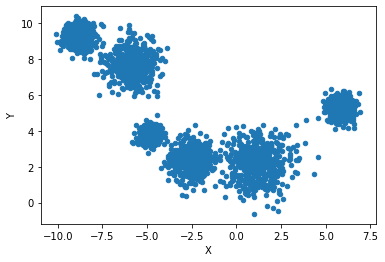

In [ ]:
import matplotlib.pyplot as pypt
X_data.head()
X_data.plot(x='X', y='Y', kind='scatter')
pypt.show()

## 2. Analyze the plotted data and decide if you should use the K-Means or DBSCAN algorithm to find the clusters? Explain your rationale.

The clusters have kind of similar diameters a K-meaqns algorithm would work best. The clusters are dense with a lot of space between them so that make K-Means a great algorithm to use.

## 3. Find the optimal number of clusters after analyzing the graph plotted using either inertia or silhouette score. Explain how you decided on the number of clusters based on the graph.

In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans

xkmeans = KMeans(n_clusters=6)
xkmeans.fit(X_data)
labels = xkmeans.predict(X_data)
print(labels)
s = metrics.silhouette_score(X_data, labels, metric='euclidean')
print("Silhouette score: ", s)

[3 2 3 ... 4 3 5]
Silhouette score:  0.7038864639522682


##4. Using clustering algorithm you decided before, cluster the generated data into the number of clusters that you decided above. Show the results (predictions).

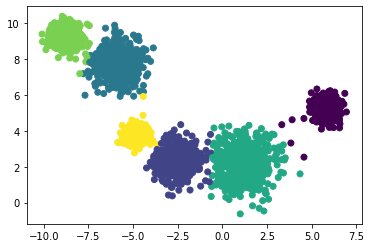

In [ ]:
centroids = x_kmeans.cluster_centers_
pypt.scatter(X_data['X'], X_data['Y'], c=labels)
pypt.show()

## 5. List the centers of each cluster found.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


The centroids' coordinates
 [[-4.79562623  3.798099  ]
 [ 5.79198047  5.25777394]
 [-8.77927224  9.28579381]
 [ 1.20844086  2.21349723]
 [-2.47714894  2.32252526]
 [-5.78020461  7.73942167]]


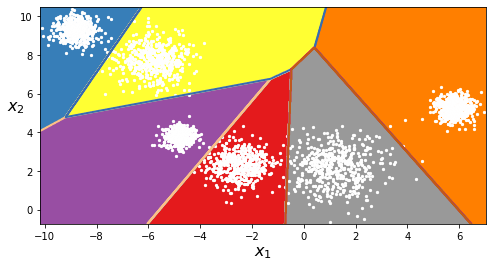

In [ ]:
import numpy as np
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_data)

def plot_centroids(centroids, weights=None, circle_color='white', cross_color='orange'):
  if weights != None:
    centroids = centroids[weights > weights.max() / 10]
    pypt.scatter(centroids[:, 0], centroids[:, 1], marker='white', s=30, linewidths=8,color=circle_color, zorder=10, alpha=0.9)
    pypt.scatter(centroids[:, 0], centroids[:, 1], marker= x , s=50, linewidths=50,color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,show_xlabels=True, show_ylabels=True):
  mins = X.min(axis=0) - 0.1
  maxs = X.max(axis=0) + 0.1
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
  np.linspace(mins[1], maxs[1], resolution))
  Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  pypt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Set1")
  pypt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=2, cmap='Accent')
  if show_centroids:
    plot_centroids(clusterer.cluster_centers_)
  if show_xlabels:
    pypt.xlabel("$x_1$", fontsize=16)
  else:
    pypt.tick_params(labelbottom=False)
  if show_ylabels:
    pypt.ylabel("$x_2$", fontsize=16, rotation=0)
  else:
    pypt.tick_params(labelleft=False)

pypt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_data)
print("The centroids' coordinates\n",centroids)
pypt.scatter(X_data['X'], X_data['Y'], c='white', s=5)
pypt.show()